# Efficiency of Banana Farm Crosspaths in BTD6

Bloons Tower Defense is a tower defense game that's been around for a very long time. I remember playing the Flash version all the way back in 2008. The team behind it, Ninja Kiwi, has released lots of iterations on the original over the years, with the most recent release being Bloons Tower Defense 6 (referred to as BTD6 from here on), which is available both on mobile and desktop computers. I primarily play it on my phone, and it's a great time-waster when you have nothing else to do.

The basic idea of BTD6, as with most tower defense games, is this:
1. You start off the round with some amount of money. You can spend this money on new towers or upgrading existing ones.
2. Once you hit the "Play" button, balloons (Bloons) of various colors (indicating their type, which means their health, types of damage they're resistant to, speed, etc) pour onto the track and your towers try to pop them.
3. Each wave of Bloons is stronger than the last.
4. The game ends when you let too many Bloons through the track, the exact number depending on your difficulty level.

There's tons of towers, Bloon types, tracks, and upgrades, too many to explain here. If you'd like to know a bit more about the game, I'd recommend this hilarious review from SsethTzeentach: https://youtu.be/XZT3nlxuXl0 

However, across all difficulty levels, the same core concept applies - to buy and upgrade towers, you need money. On all but the absolute highest difficulty (C.H.I.M.P.S), the easiest way to do this (aside from popping Bloons) is to buy Banana Farms, a tower that generates some amount of cash per round. Possible upgrades to the Banana Farm look like this:

![title](images/upgrades.jpg)

When upgrading a tower in BTD6, the player picks one primary path (row) and one secondary path. The primary path can be upgraded to the maximum Tier (5), while the secondary can only be upgraded to Tier 2. A *crosspath* is a term used to describe two separate upgrade paths, and is usually denoted in the form of x-y-z, where x-y-z are numbers. For example, a 5-2-0 crosspath means a Banana Farm with a fully upgraded top path and a Tier 2 middle path. Again, remember that the player can only upgrade 2 paths at a time, and only one of them can be specced all the way to Tier 5.

For reference, a 0-0-0 (unupgraded, or "base") Banana Farm generates 4 bunches of bananas per round, each of which is worth \$20. To collect Bananas, one has to tap the area of the screen where Bananas are dropped.

Here is a list of all possible upgrades for a Banana Farm, along with their cost on Medium difficulty:

## Top Path
* Tier 1 (Increased Production, \$500): Grows 2 extra Banana bunches per round.
* Tier 2 (Greater Production, \$600): Grows 2 MORE Banana bunches (total of 8).
* Tier 3 (Banana Plantation, \$3,000): Grows 16 Banana bunches per round.
* Tier 4 (Banana Research Facility, \$19,000): Produces 5 large Banana crates worth every round worth \$300 each. Each crate contains 15 Bananas.
* Tier 5 Banana Central, \$100,000): Crates are worth 4x more, for \$1,200 per crate. Makes Banana Research Facility be worth +25% (rounded down).

## Middle Path
* Tier 1 (Long Life Bananas, \$300): Bananas Last 30 seconds before rotting instead of 15.
* Tier 2 (Valuable Bananas, \$800): Bananas are worth 25% more cash per bunch, rounded down.
* Tier 3 (Monkey Bank, \$3,500): All money generated by this farm is now stored in the bank and earns 15% interest every round, up to a limit of \$7000. Money can be withdrawn at any time.
* Tier 4 (IMF Loan, \$8,000): Increases bank storage limit from \$7,000 to \$10,000. Gains an ability that gives \$10,000, but 50% of all income will be used to pay the debt.
* Tier 5 (Monkey-Nomics, \$100,000): Ability cooldown from 90s to 60s, limited to 2 uses per round, and ability no longer includes a debt.

## Bottom Path
* Tier 1 (EZ Collect, \$250): The collect radius of Bananas is larger and uncollected bananas auto-collect for half value. Monkey Banks will glow when full and ready to collect.
* Tier 2 (Banana Salvage, \$200): Uncollected Bananas auto-collect for almost their full amount, and Banks autocollect when full. Farm sellback rate increased by 10%.
* Tier 3 (Marketplace, \$2,900): Instead of collectable bananas, automatically generates money. Generates \$20 automatically 16 times, for a total of \$320 per round.
* Tier 4 (Central Market, \$15,000): Increases generated money from \$20 to \$70, for a total of \$1120 per round. Gives Merchantman (a naval tower that generates money) +10% income per Central Market, stacks up to 10x, for +100% income.
* Tier 5 (Monkey Wall Street, \$100,000):  Generates the same amount of money as a Central Market, but adds \$4000 and 10 lives at the end of each round.

Tier 5 upgrades are usually not worth it unless you're going past Round 100, so we won't consider them for now. We also won't consider IMF Loan abilities, since those have a cooldown and are a bit too hard to model. These limitations should hopefully be resolved in a future version of the code.

Here is the question: Assuming we only play to Round 100, what is the crosspath that generates the most money over the course of the game?

# Looking at individual crosspaths:

Let's start off by checking, for reference, how much money a single Banana Farm can generate over the course of a 100, round game. We'll assume that we start off with 1 Banana Farm on the first round (which isn't realistic, but it'll do for now). I wrote some horrible OOP code to represent the state of the game, but it should keep the code parts relatively simple and readable.

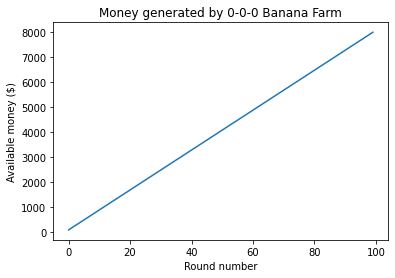

Total money: 8,000


In [116]:
import matplotlib.pyplot as plt
from game_state import GameState

NUM_ROUNDS = 100
money = [0]*NUM_ROUNDS

gs = GameState(1250)
gs.buy_farm()

for i in range(NUM_ROUNDS):

    # We only have 1 farm, so just pick the first one:
    gs.collect_from_farms()
    money[i] = gs.Money

line, = plt.plot(list(range(NUM_ROUNDS)), money)
plt.xlabel("Round number")
plt.ylabel("Available money ($)")
plt.title("Money generated by 0-0-0 Banana Farm")
plt.show()
print(f"Total money: {gs.Money:,}")


So a base Banana Farm will generate us \$8,000 over the course of 100 rounds.

You might say, "Couldn't you have just taken the money generated by a farm per round (\$80) and multiplied it by the number of rounds (100) to get the total revenue? You didn't need to write all that code," and you'd be right.

...I have nothing else to say, really. You'd be right.

An interesting metric is to understand how long it takes for a particular tower to pay for itself. This is pretty easy to calculate. You take the total cost of the tower plus the total cost of all upgrades and divide it by the amount of money the tower generates per round. For a base farm, that's $\frac{1250}{80}=15.625$, so 16 rounds.

There is a point at which it's better to start buying new farms rather than trying to upgrade existing ones. For rounds below 100, this is generally around Tier 4 - Tier 4 upgrades usually cost so much and are obtained so late in the game that they never pay themselves off. We'll make the generous assumption that some permutation of [3, 2, 0] is the most effcient crosspath to upgrade into. The question is, which one?

We'll look at a couple crosspaths and see which one takes the shortest amount of time to pay for itself. Since we'll also be looking at banks, we won't use simple algebra to calculate the number of rounds until payoff. Instead we'll "tick" (collect money from) farms until the amount reaches the cost of the farm. We also won't bother looking at Tier 2 upgrades in the bottom path, since those don't actually help us generate more money and instead just make collecting more convenient for the player.

In [117]:
from banana_farm import BananaFarm

crosspaths = [
    (0, 0, 0),

    (2, 0, 0),
    (0, 2, 0),

    (3, 2, 0),
    (2, 3, 0),
    (2, 0, 3),

    (4, 2, 0),
    (2, 4, 0),
    (2, 0, 4)
]

combos = []

for crosspath in crosspaths:
    money = 0
    count = 0
    farm = BananaFarm(*crosspath)

    while money < farm.Cost:
        money += farm.tick()
        count += 1

    combos.append((farm, count))

combos.sort(key=lambda x: x[1])
for farm, count in combos:
    print(farm, "Rounds until payoff:", count)
    

Banana Farm (2-3-0): BPR=8, MPB=$38.75, MPR=$310.0, Cost:$6,950 Rounds until payoff: 10
Banana Farm (4-2-0): BPR=5, MPB=$300, MPR=$1500, Cost:$25,450 Rounds until payoff: 14
Banana Farm (2-0-0): BPR=8, MPB=$20, MPR=$160, Cost:$2,350 Rounds until payoff: 15
Banana Farm (2-0-3): BPR=20, MPB=$20, MPR=$400, Cost:$5,700 Rounds until payoff: 15
Banana Farm (2-0-4): BPR=20, MPB=$70, MPR=$1400, Cost:$20,700 Rounds until payoff: 15
Banana Farm (0-0-0): BPR=4, MPB=$20, MPR=$80, Cost:$1,250 Rounds until payoff: 16
Banana Farm (3-2-0): BPR=16, MPB=$20, MPR=$320, Cost:$6,450 Rounds until payoff: 17
Banana Farm (0-2-0): BPR=4, MPB=$20, MPR=$80, Cost:$2,350 Rounds until payoff: 24
Banana Farm (2-4-0): BPR=8, MPB=$38.75, MPR=$310.0, Cost:$16,950 Rounds until payoff: 24


From the crosspaths we examined, it appears that the 2-3-0 crosspath beats the other crosspaths by a mile. This makes sense - a bank can store up to \$7,000, (which takes about 10 rounds to generate), and the total cost of a Monkey Bank is \$6950, \$50 short of the limit. So every time we collect from the bank (which should be done whenever it reaches its limit, to take maximum advantage of compounding interest), we can purchase a new Monkey Bank.

Another surprise is that the 3-2-0 crosspath, the one we thought would be one of the most efficient ones, is *7th* in terms of efficiency, behind even the base Banana Farm. In 2nd place we have the (very expensive) 4-2-0 crosspath. Although very efficient, it costs so much money that it's probably a much better late-game tower, and generally not worth upgrading into early.

3rd place has a 3-way tie, with 2-0-0, 2-0-3, and 2-0-4 taking the same amount of time to pay themselves off. I won't examine each one, but it seems that the clear early-game winner is the 2-0-0 crosspath.

Tied for last place are the 0-2-0 and 2-4-0 crosspaths. A 25% bump on top of the base \$80 per round is really not enough to justify the cost of the upgrade. As for the 2-4-0 crosspath, keep in mind that we didn't consider the IMF Loan ability, which could bump it up a few rungs. Without it, however, the increased stored limit of \$10,000 doesn't justify the cost of the tower.

## Dividend Reinvesting

Comparing the towers individually is one thing, but players will almost never build just one Banana Farm. Generally, a player can be expected to get up to 10 or even 15 farms in a game, depending on how aggressively they are saving up. To get the arguably most powerful tower in the game, the Vengeful True Sun God, one needs to generate piles of money every round. Reinvesting this money into existing towers is pointless if they already deal enough damage to kill a wave, so the money should either be saved up or reinvested into new Banana Farms.

Now the question becomes, "Assuming we reinvest all our generated funds into Banana Farms, which crosspath generates the most money at the end of the game (Round 100)?"

We'll utilize the GameState object, which I've constructed to abstract away some of the vagaries of checking if we can afford an upgrade, making new BananaFarm object, and so on. The logic is pretty simple: we'll start off with a single 0-0-0 Banana Farm and upgrade it to a desired crosspath. Once that's done, we'll buy a new Banana Farm and upgrade that fully, and so on. At the end of the simulation, we'll see how much total money we generated.

The logic is going to be pretty repetitive, so let's turn it into a function that takes a desired crosspath and returns a list with the total revenue generated in every round, as well as the amount of money in the GameState at any particular time. It'll also give us back the GameState object.

In [118]:
def run_simulation(upgrade_order):
    
    # upgrade_order is a list of integers, with each element describing
    # the index of the next path we want to upgrade. For example, a list
    # like [0, 0, 0, 1, 1] would mean that we first upgrade our Farm to
    # 3-0-0 and then to 3-2-0.

    # number of rounds in simulation
    NUM_ROUNDS = 100

    revenue = 0
    revenue_list = []
    money_list = []
    
    # Calculate what a fully-upgraded tower's tier list should look like
    max_upgrade_tiers = [0, 0, 0]    
    for i in upgrade_order:
        max_upgrade_tiers[i] += 1

    # Start off with a single farm
    gs = GameState(1250)
    gs.buy_farm()

    # Run simulation
    for _ in range(NUM_ROUNDS):

        # Collect all money we can first:
        revenue += gs.collect_from_farms()

        # Go through each farm and try to upgrade it using our upgrade order
        for farm in gs.Farms:

            while sum(farm.Upgrades) < len(upgrade_order):
                upgrade_idx = sum(farm.Upgrades)
                upgrade_path = upgrade_order[upgrade_idx]

                if upgrade_path in gs.get_upgradable_paths(farm):
                    gs.upgrade_path_for_farm(farm, upgrade_path)
                else:
                    break

            # If we weren't able to upgrade a farm fully, don't bother
            # upgrading the other farms:
            if sum(farm.Upgrades) < len(upgrade_order):
                break

        # Now buy as many farms as we can and try to upgrade those fully:
        while gs.can_buy_farm() and gs.Farms[-1].Upgrades == max_upgrade_tiers:

            gs.buy_farm()
            farm = gs.Farms[-1]
            # print("bought farm")
            while sum(farm.Upgrades) < len(upgrade_order):
                upgrade_idx = sum(farm.Upgrades)
                upgrade_path = upgrade_order[upgrade_idx]

                if upgrade_path in gs.get_upgradable_paths(farm):
                    gs.upgrade_path_for_farm(farm, upgrade_path)
                else:
                    break

            # If we weren't able to upgrade a farm fully, don't bother
            # upgrading the other farms:
            if sum(farm.Upgrades) < len(upgrade_order):
                break
        
        revenue_list.append(revenue)
        money_list.append(gs.Money)

    return gs, revenue_list, money_list

orders = [
    [], # 0-0-0
    [0, 0], # 2-0-0
    [0, 0, 0, 1, 1], # 3-2-0
    [0, 0, 2, 2, 2], # 2-0-3
    [0, 0, 1, 1, 1], # 2-3-0
    [0, 0, 0, 1, 1, 0], # 4-2-0
    [0, 0, 1, 1, 1, 1] # 2-4-0
]

for upgrade_order in orders:

    max_upgrade_tiers = [0, 0, 0]
    for i in upgrade_order:
        max_upgrade_tiers[i] += 1

    name = "-".join([str(i) for i in max_upgrade_tiers])
    
    gs, revenue_list, money_list = run_simulation(upgrade_order)
    print(f"At round 100, {name} generated ${revenue_list[-1]:,}")

At round 100, 0-0-0 generated $361,680
At round 100, 2-0-0 generated $629,520
At round 100, 3-2-0 generated $295,080
At round 100, 2-0-3 generated $448,280
At round 100, 2-3-0 generated $448,800
At round 100, 4-2-0 generated $74,840
At round 100, 2-4-0 generated $79,680


...that's somewhat unexpected. 2-3-0 is supposed to be the most efficient crosspath, so why is 2-0-0 generating the most amount of money by Round 100? And why is it beating the other crosspaths by a mile?

The clue might be the fact that the simulation is allowed to purchase as many farms as it wants, regardless of how much space there actually is on the "map". Again, most players will only buy up to 10 or 15, and this is mostly due to the physical constraints of the map. Banana Farms have a large footprint, and there just isn't enough space for more than a handful. We can alter the code a little bit to tell us how many farms are actually in the GameState:

In [119]:
for upgrade_order in orders:

    max_upgrade_tiers = [0, 0, 0]
    for i in upgrade_order:
        max_upgrade_tiers[i] += 1

    name = "-".join([str(i) for i in max_upgrade_tiers])
    
    gs, revenue_list, money_list = run_simulation(upgrade_order)
    print(f"At round 100, {name} generated ${revenue_list[-1]:,} with {len(gs.Farms)} farms")

At round 100, 0-0-0 generated $361,680 with 290 farms
At round 100, 2-0-0 generated $629,520 with 268 farms
At round 100, 3-2-0 generated $295,080 with 46 farms
At round 100, 2-0-3 generated $448,280 with 79 farms
At round 100, 2-3-0 generated $448,800 with 65 farms
At round 100, 4-2-0 generated $74,840 with 3 farms
At round 100, 2-4-0 generated $79,680 with 5 farms


290 and 268 farms! These are clearly not realistic numbers if we're talking about maps on which we can only fit maybe 10 or 15. Let's modify our `run_simulation` function a little bit to also take a parameter `farm_limit`. If there are `farm_limit` farms on the map, we will stop buying Banana Farms.

In [120]:
def run_simulation_with_limit(upgrade_order, farm_limit):
    
    # upgrade_order is a list of integers, with each element describing
    # the index of the next path we want to upgrade. For example, a list
    # like [0, 0, 0, 1, 1] would mean that we first upgrade our Farm to
    # 3-0-0 and then to 3-2-0.

    # number of rounds in simulation
    NUM_ROUNDS = 100

    revenue = 0
    revenue_list = []
    money_list = []
    
    # Calculate what a fully-upgraded tower's tier list should look like
    max_upgrade_tiers = [0, 0, 0]    
    for i in upgrade_order:
        max_upgrade_tiers[i] += 1

    # Start off with a single farm
    gs = GameState(1250)
    gs.buy_farm()

    # Run simulation
    for _ in range(NUM_ROUNDS):

        # Collect all money we can first:
        revenue += gs.collect_from_farms()

        # Go through each farm and try to upgrade it using our upgrade order
        for farm in gs.Farms:

            while sum(farm.Upgrades) < len(upgrade_order):
                upgrade_idx = sum(farm.Upgrades)
                upgrade_path = upgrade_order[upgrade_idx]

                if upgrade_path in gs.get_upgradable_paths(farm):
                    gs.upgrade_path_for_farm(farm, upgrade_path)
                else:
                    break

            # If we weren't able to upgrade a farm fully, don't bother
            # upgrading the other farms:
            if sum(farm.Upgrades) < len(upgrade_order):
                break

        # Now buy as many farms as we can and try to upgrade those fully:
        while gs.can_buy_farm() and gs.Farms[-1].Upgrades == max_upgrade_tiers and len(gs.Farms) < farm_limit:

            gs.buy_farm()
            farm = gs.Farms[-1]
            # print("bought farm")
            while sum(farm.Upgrades) < len(upgrade_order):
                upgrade_idx = sum(farm.Upgrades)
                upgrade_path = upgrade_order[upgrade_idx]

                if upgrade_path in gs.get_upgradable_paths(farm):
                    gs.upgrade_path_for_farm(farm, upgrade_path)
                else:
                    break

            # If we weren't able to upgrade a farm fully, don't bother
            # upgrading the other farms:
            if sum(farm.Upgrades) < len(upgrade_order):
                break
        
        revenue_list.append(revenue)
        money_list.append(gs.Money)

    return gs, revenue_list, money_list

Now let's run the simulations again, (generously) assuming we can only fit 15 farms on the map:

In [121]:
LIMIT = 15

for upgrade_order in orders:

    max_upgrade_tiers = [0, 0, 0]
    for i in upgrade_order:
        max_upgrade_tiers[i] += 1

    name = "-".join([str(i) for i in max_upgrade_tiers])
    
    gs, revenue_list, money_list = run_simulation_with_limit(upgrade_order, LIMIT)
    print(f"At round 100, {name} generated ${revenue_list[-1]:,} with {len(gs.Farms)} farms")

At round 100, 0-0-0 generated $75,440 with 15 farms
At round 100, 2-0-0 generated $139,520 with 15 farms
At round 100, 3-2-0 generated $207,800 with 15 farms
At round 100, 2-0-3 generated $232,320 with 15 farms
At round 100, 2-3-0 generated $320,880 with 15 farms
At round 100, 4-2-0 generated $74,840 with 3 farms
At round 100, 2-4-0 generated $79,680 with 5 farms


These are much better numbers. Obviously, if we've run out of space for new farms, we should upgrade our farms to the most efficient crosspath possible, which is 2-3-0. This is why the 0-0-0 and 2-0-0 crosspaths fall off so hard once the space limit is imposed. 

I also included the 4-2-0 crosspath just for fun, since it was #2 in terms of efficiency. Unsurprisingly, however, in the short period that this simulation lasts, it takes far too long to save up for the Tier 4 upgrade, even if we get to 3-2-0 before upgrading to 4-2-0. It's simply more efficient to outright buy new Banana Farms and upgrade them to a Tier-3/Tier-2 crosspath.

Finally, let's graph the revenue over time for each of the crosspaths:

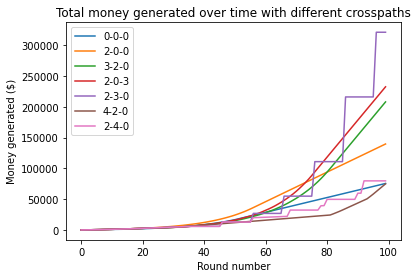

In [122]:
for upgrade_order in orders:

    max_upgrade_tiers = [0, 0, 0]
    for i in upgrade_order:
        max_upgrade_tiers[i] += 1

    name = "-".join([str(i) for i in max_upgrade_tiers])
    
    gs, revenue_list, money_list = run_simulation_with_limit(upgrade_order, LIMIT)
    line, = plt.plot(list(range(NUM_ROUNDS)), revenue_list, label=name)

plt.title("Total money generated over time with different crosspaths")
plt.xlabel("Round number")
plt.ylabel("Money generated ($)")
plt.legend()
plt.show()

Although it's interesting to look at the total amount of money generated, it's also useful to look at the *surplus* money each cross path ends up accumulating. Since we run out of space at some point, money will no longer be reinvested into farms and will instead continue growing. What does that look like?

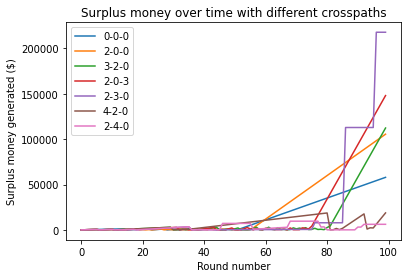

In [123]:
for upgrade_order in orders:

    max_upgrade_tiers = [0, 0, 0]
    for i in upgrade_order:
        max_upgrade_tiers[i] += 1

    name = "-".join([str(i) for i in max_upgrade_tiers])
    
    gs, revenue_list, money_list = run_simulation_with_limit(upgrade_order, LIMIT)
    line, = plt.plot(list(range(NUM_ROUNDS)), money_list, label=name)

plt.title("Surplus money over time with different crosspaths")
plt.xlabel("Round number")
plt.ylabel("Surplus money generated ($)")
plt.legend()
plt.show()

Interestingly, although the 2-3-0 crosspath is among the last to stop reinvesting its generated money, it still ends up with the largest amount of surplus money in the end. Impressive!

## Conclusion, Limitations and Future Work

Ultimately, this notebook is simply confirming what has been known in the BTD6 meta for a long time - namely, that the 2-3-0 Monkey Bank is by far the most efficient Banana Farm crosspath. A key problem with the Monkey Bank, however, is that its funds are only accessible once every 10 rounds, meaning that the player has to rely on income received from popping Bloons. This a pretty significant restriction, since more powerful (and consequently, more expensive) tower upgrades require sums of money only available through Banana Farms. However, players also don't upgrade their towers continuously (especially when Tier-4 and Tier-5 upgrades cost tens of thousands of \$), so the utility of a consistent cashflow is questionable in later rounds. The question of early-game rounds remains quite open, however.

I mentioned before that some crosspaths and effects won't be considered because they require additional logic (in the case of a 5-x-x crosspath) and assumptions about how long a round can last (in the case of the IMF Loan ability). This may impact the true utility of some crosspaths, and I hope to include further logic in the future regarding use of abilities and Tier 5 upgrades.

I also hope to develop a more general theorycrafting toolkit that allows me to simulate not just income from Banana Farms, but full games of BTD6. This is an ambitious goal, and I'm not quite sure if it is feasible considering the sheer number of variables that goes into running a BTD6 round - things such as collision detection, movement speed of Bloons, what kinds of Bloons spawn once a different kind is popped, and so on. Perhaps an "approximate" simulation with many assumptions (such as a straight track, for example) is more realistic. The hope is to use such a tool to discover new builds that other players might not have seen, and stir the imagination of BTD6 players into considering what is truly possible. Again, perhaps dangerously ambitious - but what's the point if one doesn't try?

Thank you for reading!